<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats.metrics
## Quickstart Guide

### <http://compstats.readthedocs.org>


## Installing CompStats

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [ ]:
try:
  import CompStats
except ImportError:
    !pip install Compstats
    # !pip install -U git+https://github.com/INGEOTEC/CompStats@develop

# CompStats.metrics

`CompStats.metrics` aims to facilitate performance measurement (with standard errors and confidence intervals) and statistical comparisons between algorithms on a single problem, wrapping the different scores and loss functions found on `metrics`.

To illustrate the use of `CompStats.metrics`, the following snippets show an example. The instructions load the necessary libraries, including the one to obtain the problem (e.g., digits), four different classifiers, and the last line is the score used to measure the performance and compare the algorithm.

In [12]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from CompStats.metrics import f1_score

The first step is to load the digits problem and split the dataset into training and validation sets. The second step is to estimate the parameters of a linear Support Vector Machine and predict the validation set's classes. The predictions are stored in the variable `hy`.

In [13]:
X, y = load_digits(return_X_y=True)
_ = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = _
m = LinearSVC().fit(X_train, y_train)
hy = m.predict(X_val)

Once the predictions are available, it is time to measure the algorithm's performance, as seen in the following code. It is essential to note that the API used in `metrics` is followed; the difference is that the function returns an instance with different methods that can be used to estimate different performance statistics and compare algorithms.

In [14]:
score = f1_score(y_val, hy, average='macro')
score

100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


<Perf(score_func=f1_score, statistic=0.9521, se=0.0097)>

The previous code shows the macro-f1 score and, in parenthesis, its standard error. The actual performance value is stored in the attributes `statistic` function, and `se`.

In [15]:
score.statistic, score.se

(0.9521479775366307, 0.009717884979482313)

Continuing with the example, let us assume that one wants to test another classifier on the same problem, in this case, a random forest, as can be seen in the following two lines. The second line predicts the validation set and sets it to the analysis.

In [16]:
ens = RandomForestClassifier().fit(X_train, y_train)
score(ens.predict(X_val), name='Random Forest')

100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


<Perf(score_func=f1_score)>
Statistic with its standard error (se)
statistic (se)
0.9720 (0.0076) <= Random Forest
0.9521 (0.0097) <= alg-1

Let us incorporate another predictions, now with Naive Bayes classifier, and Histogram Gradient Boosting as seen below.

In [17]:
nb = GaussianNB().fit(X_train, y_train)
score(nb.predict(X_val), name='Naive Bayes')
hist = HistGradientBoostingClassifier().fit(X_train, y_train)
score(hist.predict(X_val), name='Hist. Grad. Boost. Tree')

100%|██████████| 2/2 [00:02<00:00,  1.00s/it]


<Perf(score_func=f1_score)>
Statistic with its standard error (se)
statistic (se)
0.9759 (0.0068) <= Hist. Grad. Boost. Tree
0.9720 (0.0076) <= Random Forest
0.9521 (0.0097) <= alg-1
0.8266 (0.0159) <= Naive Bayes

The performance, its confidence interval (5\%), and a statistical comparison (5\%) between the best performing system with the rest of the algorithms is depicted in the following figure.

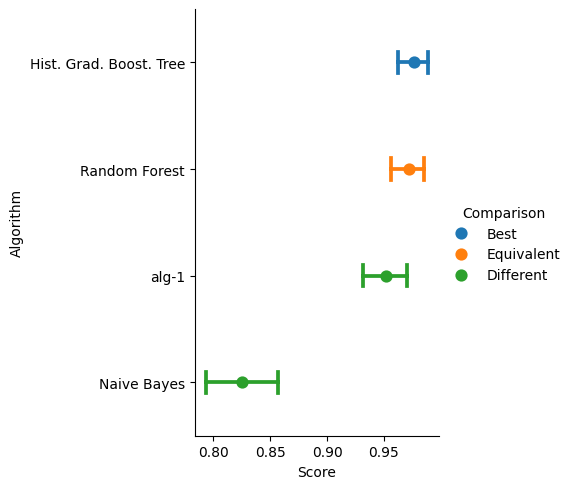

In [18]:
score.plot()

The final step is to compare the performance of the four classifiers, which can be done with the `Perf.difference` method, as seen next.  

In [22]:
diff = score.difference()
diff

<Difference>
difference p-values  w.r.t Hist. Grad. Boost. Tree
0.0000 <= Naive Bayes
0.0100 <= alg-1
0.3240 <= Random Forest

The class `CompStats.Difference` has the `CompStats.Difference.plot` method that can be used to depict the difference with respectto the best.

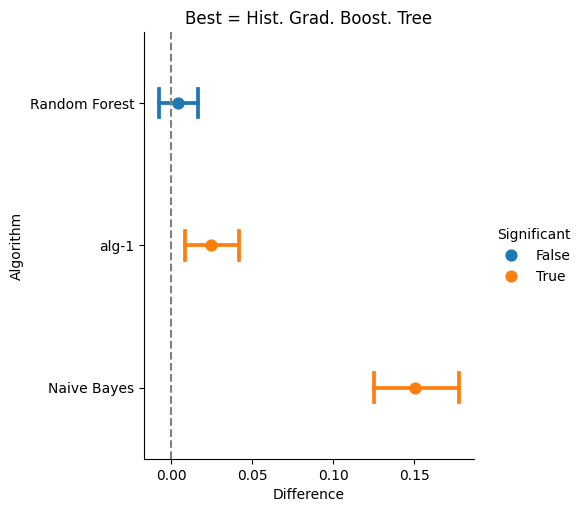

In [23]:
diff.plot()